### Import required libraries

In [1]:
import pandas as pd
import numpy as np

<br>

### Import dataset from the File System

In [2]:
with open('data/crime.csv', encoding = 'latin-1') as csv_file:
    df = pd.read_csv(csv_file)

#### Test Imported File

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


<br>

### Exploratory Data Analysis

#### Descriptive Statistics

In [11]:
# this describes the basic statistics of the dataset
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [14]:
# this divides the dataset into categories
df['OFFENSE_CODE_GROUP'].value_counts().head()

# e.g. here we have 25935 number of 'Larceny' in OFFENSE_CODE_GROUP

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Name: OFFENSE_CODE_GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176819BD5F8>,
      dtype=object)

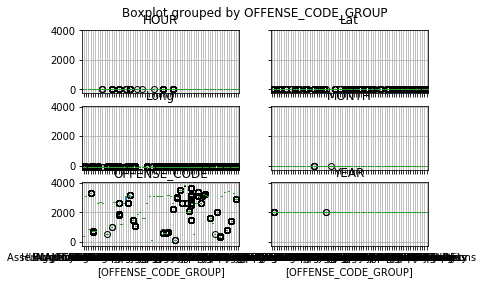

In [35]:
df.boxplot(by = 'OFFENSE_CODE_GROUP')

# note: generally data visualization techniques are used for this kinda stuff

<br>

### GroupBy

This is a function provided by `pandas` and it is used on categorical variables

#### Form groups based on a single category

In [51]:
# create a copy of the dataset
new_df = df.copy()

# group the dataset on the basis of 'OFFENSE_CODE_GROUP'
new_df_group = new_df.groupby('OFFENSE_CODE_GROUP')

# get first entries in all the groups formed
new_df_group.first().head()  # only the top 5

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,
Aggravated Assault,I182070815,423,ASSAULT - AGGRAVATED,E13,582,Y,2018-09-03 12:40:00,2018,9,Monday,12,Part One,CENTRE ST,42.322594,-71.106196,"(42.32259354, -71.10619643)"
Aircraft,I182054205,3122,AIRCRAFT INCIDENTS,A7,36,NaN,2018-07-10 12:54:00,2018,7,Tuesday,12,Part Three,HARBORSIDE DR,42.362525,-71.025338,"(42.36252502, -71.02533782)"
Arson,I182070739,900,ARSON,B3,446,NaN,2018-09-03 01:00:00,2018,9,Monday,1,Other,NORWELL ST,42.298284,-71.078694,"(42.29828416, -71.07869447)"
Assembly or Gathering Violations,I182070918,3305,DEMONSTRATIONS/RIOT,D4,130,NaN,2018-09-03 17:00:00,2018,9,Monday,17,Part Three,HUNTINGTON AVE,42.348577,-71.077720,"(42.34857652, -71.07772012)"
Auto Theft,I182070933,724,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"


In [54]:
# get all the values in the 'Towed' group
new_df_group.get_group('Towed').head()  # only the top 5

,DAY_OF_WEEK,DISTRICT,HOUR,INCIDENT_NUMBER,Lat,Location,Long,MONTH,OCCURRED_ON_DATE,OFFENSE_CODE,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,STREET,UCR_PART,YEAR
2,Monday,D4,19,I182070941,42.346589,"(42.34658879, -71.07242943)",-71.072429,9,2018-09-03 19:27:00,3410,TOWED MOTOR VEHICLE,151,NaN,CAZENOVE ST,Part Three,2018
93,Monday,C6,13,I182070832,42.332987,"(42.33298734, -71.04282382)",-71.042824,9,2018-09-03 13:18:00,3410,TOWED MOTOR VEHICLE,229,NaN,E SIXTH ST,Part Three,2018
126,Monday,NaN,11,I182070799,-1.000000,"(-1.00000000, -1.00000000)",-1.000000,9,2018-09-03 11:55:00,3410,TOWED MOTOR VEHICLE,,NaN,CHELSEA,Part Three,2018
137,Monday,E18,10,I182070787,42.277589,"(42.27758926, -71.11755202)",-71.117552,9,2018-09-03 10:11:00,3410,TOWED MOTOR VEHICLE,499,NaN,NAVARRE ST,Part Three,2018
151,Monday,D14,10,I182070776,42.350427,"(42.35042708, -71.13496065)",-71.134961,9,2018-09-03 10:08:00,3410,TOWED MOTOR VEHICLE,794,NaN,GREYLOCK RD,Part Three,2018


#### Form groups based on more than one category

**Explaination**: *It creates groups on the basis of first categories, and then creates groups inside these existing groups on the basis of the second category, and so on...*

In [59]:
# create a copy of the dataset
new_df = df.copy()

# create groups based on 'OFFENSE_CODE_GROUP' and 'STREET'
new_df_group = new_df.groupby(['OFFENSE_CODE_GROUP', 'STREET'])

# get first elements from all the groups
new_df_group.first().head()  # only the top 5

INCIDENT_NUMBER  OFFENSE_CODE  \
OFFENSE_CODE_GROUP STREET                                             
Aggravated Assault  ALBANY ST              I152065809           413   
                    COMMONWEALTH AVE       I152064647           423   
                   132 BROOK AVE           I152065124           423   
                   55 FAYWOOD AVE          I172067526           413   
                   A ST                    I162019249           423   

                                                  OFFENSE_DESCRIPTION  \
OFFENSE_CODE_GROUP STREET                                               
Aggravated Assault  ALBANY ST          ASSAULT - AGGRAVATED - BATTERY   
                    COMMONWEALTH AVE             ASSAULT - AGGRAVATED   
                   132 BROOK AVE                 ASSAULT - AGGRAVATED   
                   55 FAYWOOD AVE      ASSAULT - AGGRAVATED - BATTERY   
                   A ST                          ASSAULT - AGGRAVATED   

                                      DISTRICT REPORTING_AREA SHOOTING  \
OFFENSE_CODE_GROUP STREET                                                
Aggravated Assault  ALBANY ST               D4            171      NaN   
                    COMMONWEALTH AVE       D14            796      NaN   
                   132 BROOK AVE            B2                     NaN   
                   55 FAYWOOD AVE           A7              2      NaN   
                   A ST                     C6            205      NaN   

                                          OCCURRED_ON_DATE  YEAR  MONTH  \
OFFENSE_CODE_GROUP STREET                                                 
Aggravated Assault  ALBANY ST          2015-08-09 12:33:00  2015      8   
                    COMMONWEALTH AVE   2015-08-05 11:59:00  2015      8   
                   132 BROOK AVE       2015-08-06 21:14:00  2015      8   
                   55 FAYWOOD AVE      2017-08-16 16:21:00  2017      8   
                   A ST                2016-03-12 01:52:00  2016      3   

                                      DAY_OF_WEEK  HOUR  UCR_PART        Lat  \
OFFENSE_CODE_GROUP STREET                                                      
Aggravated Assault  ALBANY ST              Sunday    12  Part One  42.333610   
                    COMMONWEALTH AVE    Wednesday    11  Part One  42.350540   
                   132 BROOK AVE         Thursday    21  Part One        NaN   
                   55 FAYWOOD AVE       Wednesday    16  Part One        NaN   
                   A ST                  Saturday     1  Part One  42.349349   

                                            Long                     Location  
OFFENSE_CODE_GROUP STREET                                                      
Aggravated Assault  ALBANY ST         -71.073370  (42.33361000, -71.07337000)  
                    COMMONWEALTH AVE  -71.131067  (42.35053956, -71.13106722)  
                   132 BROOK AVE             NaN     (0.00000000, 0.00000000)  
                   55 FAYWOOD AVE            NaN     (0.00000000, 0.00000000)  
                   A ST               -71.049259  (42.34934874, -71.04925904)

In [63]:
# get top 5 items inside the subgroup 'ALBANY ST' of the group 'Aggravated Assault'
new_df_group.get_group(('Aggravated Assault', 'ALBANY ST')).head()

,DAY_OF_WEEK,DISTRICT,HOUR,INCIDENT_NUMBER,Lat,Location,Long,MONTH,OCCURRED_ON_DATE,OFFENSE_CODE,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,UCR_PART,YEAR
9767,Monday,D4,15,I182060189,42.334288,"(42.33428841, -71.07239518)",-71.072395,7,2018-07-30 15:49:00,413,ASSAULT - AGGRAVATED - BATTERY,172,NaN,Part One,2018
10363,Saturday,D4,11,I182059540,NaN,"(0.00000000, 0.00000000)",NaN,7,2018-07-28 11:58:00,413,ASSAULT - AGGRAVATED - BATTERY,,NaN,Part One,2018
35283,Wednesday,D4,15,I182033013,42.334288,"(42.33428841, -71.07239518)",-71.072395,5,2018-05-02 15:07:00,423,ASSAULT - AGGRAVATED,172,NaN,Part One,2018
37815,Monday,D4,11,I182030365,42.339975,"(42.33997488, -71.06446552)",-71.064466,4,2018-04-23 11:30:00,423,ASSAULT - AGGRAVATED,165,NaN,Part One,2018
41029,Wednesday,D4,11,I182026958,NaN,"(0.00000000, 0.00000000)",NaN,4,2018-04-11 11:35:00,413,ASSAULT - AGGRAVATED - BATTERY,,NaN,Part One,2018
